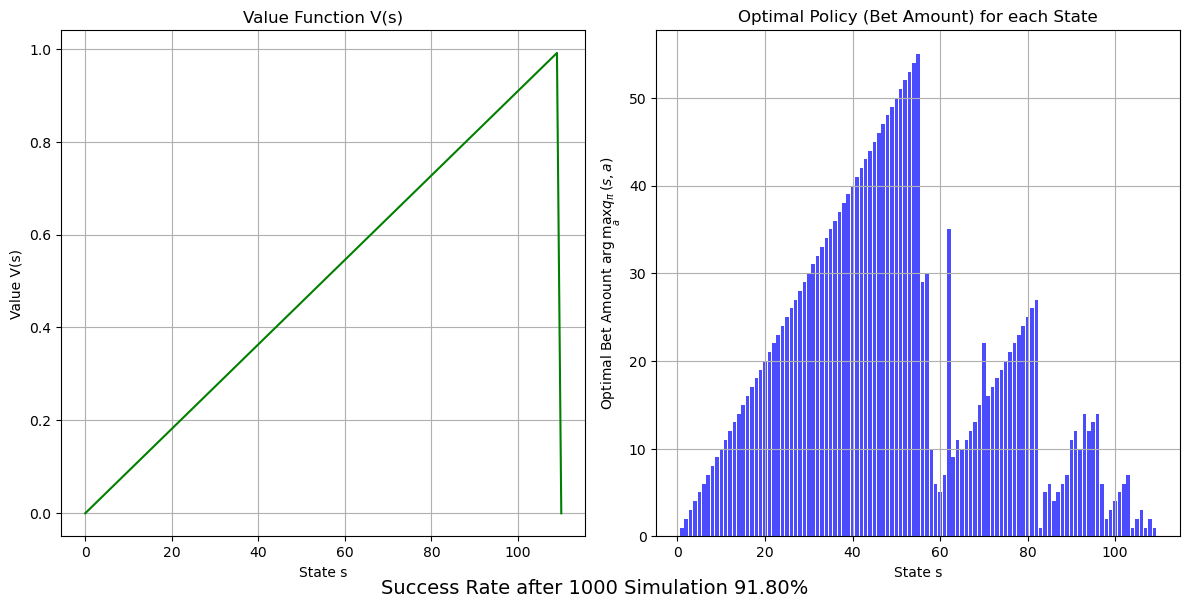

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

gamma = 1  # Discount factor (no discount in this case)
p_H = 0.5  # Probability of heads (win)
max_money = 110  # Goal amount
theta = 0.0001  # Convergence
num_simulations = 1000

V = np.zeros(max_money + 1)
policy = np.zeros(max_money, dtype=int)

rewards = np.zeros(max_money + 1)
rewards[max_money] = 1

def one_step_lookahead(s, V, rewards):
    A = np.zeros(max_money + 1)
    for a in range(1, min(s, max_money-s)+1):
        A[a] = p_H * (rewards[s+a] + V[s+a] * gamma) + (1-p_H) * (rewards[s-a] + V[s-a] * gamma) # Expected value
    return A

# "Policy Evaluation" and "Policy Improvement" Iteration
while True:
    delta = 0
    for s in range(1, max_money):
        A = one_step_lookahead(s, V, rewards) # Calculate the action values
        best_action_value = np.max(A) # Get the best action value
        delta = max(delta, np.abs(best_action_value - V[s])) # Calculate the delta across all states
        V[s] = best_action_value

    if delta < theta:
        break

# Extract the policy
for s in range(1, max_money):
    A = one_step_lookahead(s, V, rewards) 
    best_action = np.argmax(A)
    policy[s] = best_action

# Simulate games to calculate success percentage
def simulate_game(start_money, policy, p_H, max_money):
    money = start_money
    while money > 0 and money < max_money:
        stake = policy[money]
        if random.random() < p_H:  # Win
            money += stake
        else:  # Lose
            money -= stake
    return money == max_money

win_count = 0
start_money = 100
for _ in range(num_simulations):
    if simulate_game(start_money, policy, p_H, max_money):
        win_count += 1

win_rate = (win_count / num_simulations) * 100

plt.figure(figsize=(12, 6))

# Plot the value function
plt.subplot(1, 2, 1)
plt.plot(range(max_money + 1), V, color='green')
plt.title("Value Function V(s)")
plt.xlabel("State s")
plt.ylabel("Value V(s)")
plt.grid(True)

# Plot the optimized policy
plt.subplot(1, 2, 2)
plt.bar(range(1, max_money), policy[1:], color='blue', alpha=0.7)
plt.title("Optimal Policy (Bet Amount) for each State")
plt.xlabel("State s")
plt.ylabel(r"Optimal Bet Amount $\arg\max_a q_\pi(s, a)$")
plt.grid(True)

plt.figtext(0.5, 0.001, f"Success Rate after 1000 Simulation {win_rate:.2f}%", ha="center", fontsize=14)

plt.tight_layout()
plt.show()


In [2]:
current_money = int(80)
if 0 < current_money < max_money:
    print(f"You should bet: {policy[current_money]} units")
else:
    print("Invalid amount of money")

You should bet: 25 units
